In [1]:
from dihedral import *
from entropy import *

In [2]:
import numpy as np
import MDAnalysis as mda
import seaborn as sns
import matplotlib.pyplot as plt
from MDAnalysis.lib.nsgrid import FastNS

In [3]:
u = mda.Universe("/home/dibya/Dibyendu/PointNet/Sample_Structures/Ice/liquid.gro")

In [8]:
obj1 = OrderParameter(u, cutoff=4.0)

In [9]:
#obj1.OTO()

In [10]:
obj1.F4()

  0%|          | 0/11222 [00:00<?, ?it/s]

/home/dibya/Soft/anaconda3/lib/python3.9/site-packages/joblib/externals/cloudpickle/cloudpickle_fast.py:602: UserWarning: Reader has no dt information, set to 1.0 ps
  return Pickler.dump(self, obj)


(array([  6.,  13.,   8.,  10.,  24.,  30.,  41.,  48.,  74.,  78., 136.,
        140., 212., 228., 293., 303., 393., 389., 434., 493., 503., 590.,
        563., 546., 609., 566., 558., 570., 503., 397., 392., 358., 330.,
        308., 230., 193., 152., 117.,  92.,  85.,  52.,  55.,  42.,  16.,
         12.,  10.,   4.,   8.,   1.,   3.]),
 array([-0.83408403, -0.80005949, -0.76603495, -0.73201041, -0.69798587,
        -0.66396132, -0.62993678, -0.59591224, -0.5618877 , -0.52786316,
        -0.49383861, -0.45981407, -0.42578953, -0.39176499, -0.35774045,
        -0.3237159 , -0.28969136, -0.25566682, -0.22164228, -0.18761774,
        -0.15359319, -0.11956865, -0.08554411, -0.05151957, -0.01749502,
         0.01652952,  0.05055406,  0.0845786 ,  0.11860314,  0.15262769,
         0.18665223,  0.22067677,  0.25470131,  0.28872585,  0.3227504 ,
         0.35677494,  0.39079948,  0.42482402,  0.45884856,  0.49287311,
         0.52689765,  0.56092219,  0.59494673,  0.62897127,  0.66299582,
 

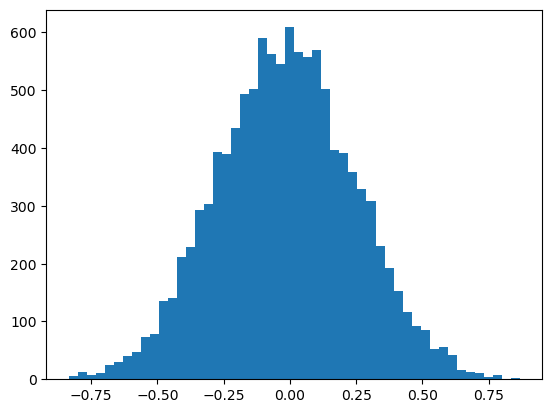

In [11]:
plt.hist(obj1.f4, bins= 50)

In [28]:
np.where(obj1.tetra_orient < 0)

(array([  851,  1457,  1814,  2161,  2689,  3228,  5700,  6445,  6593,
         7435,  7565,  8191,  8282,  8404,  8832,  8976, 10596, 10604,
        10727, 10748]),)

In [9]:
dist

(array([  84, 1389, 7264, 3959]),
 array([2.65898456, 2.67105002, 2.84086232, 2.9208558 ]))

In [11]:
test_singleTTO(dist)

-0.6578338515241839

In [74]:
from MDAnalysis.lib.distances import calc_angles

In [64]:
import math

In [162]:

def calc_angle(a, b, c):
    """Calculate the angle between ba and cb"""
    ba = a - b
    bc = c - b
    cos_theta = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    theta = math.acos(cos_theta)
    return theta

In [161]:
math.acos?

Signature: math.acos(x, /)
Docstring:
Return the arc cosine (measured in radians) of x.

The result is between 0 and pi.
Type:      builtin_function_or_method


In [192]:
############# orientational tetrahedral order parameter........
def singleOTO(item,li, dimensions, pos):
    #u = self.u
    #gridsearch = _FastNS(5.0, u.select_atoms("name OW").positions, u.dimensions, pbc=True)
    #pos = self.pos
    #results = gridsearch.self_search()
    #arr = self.arr
    #li = self._filter_(item,arr, pos)[0]
    q = 0.0
    #try:
    for i in range(3):
        for j in range(i+1, 4):
            cos_phi = math.cos(calc_angle(pos[li[i]],pos[item], pos[li[j]]))
            q += (cos_phi + (1 / 3)) ** 2
            print(q,(cos_phi + 1 / 3) ** 2, 3 *q/ 8)
    q = 1 - (3 *q/ 8 )

    #except Exception:
    #    print(f"Check for atom : {item}!")
    #    print("Specify cutoff!!")
    return q

In [227]:
def calc_oto(coords, ref):
    """Calculate the orientational tetrahedral order parameter (OTO) for a water molecule"""
    q = 0.0
    for i in range(3):
        for j in range(i+1, 4):
            cos_psi = np.cos(calc_angle(coords[i], ref, coords[j]))
            theta = calc_angle(coords[i], ref, coords[j])
            #print(np.rad2deg(theta), )
            print(q)
            q += (np.cos(theta) + 0.333)**2

    q = 1 - 3/8 * q
    return q

In [233]:
atoms = u.select_atoms("name OW")
atoms.write("test.xyz")

In [237]:
data = (np.loadtxt("test_oto_raw.dat"))

In [255]:
np.where((data > 0.0) & (data < 0.01))

(array([ 4305,  9266, 11107]),)

In [248]:
np.argmax(data)

5255

In [228]:
calc_oto(pos[li], pos[851])

0.0
1.2180619376973798
1.4588751925130172
1.544143195607945
2.4217876878725604
2.7452632653707925


-0.13468624848126876

In [262]:
item = 7565
arr = obj1.arr
pos = obj1.pos
dist = obj1._filter_(item, arr, pos)
li = obj1._filter_(item,arr, pos)[0]
#li = [3906, 7102, 4046, 3939]
dimensions = obj1.dimensions
singleOTO(item,li, dimensions, pos)

0.07322068318084658 0.07322068318084658 0.02745775619281747
0.7874868367839443 0.7142661536030976 0.2953075637939791
1.8535199242189622 1.066033087435018 0.6950699715821108
2.277416698436734 0.4238967742177716 0.8540312619137752
2.4414508324511823 0.16403413401444836 0.9155440621691934
3.6773237872756086 1.2358729548244265 1.3789964202283533


-0.37899642022835334

In [257]:
li

array([7212, 3478, 3599, 5844])

In [97]:
nnset = set(arr[np.where((arr[:,0] == 851) | (arr[:,1]==851))[0]].ravel())

In [133]:
myset = np.unique(u.select_atoms("same resid as (around 3.6 resid 852)").resids)

In [134]:
index = np.argsort([calc_bonds(pos[851], pos[i], u.dimensions) for i in myset])
myset[index]

array([3907, 7103, 4047, 3940, 3183, 6872, 3306, 3210, 3025, 7165, 1618])

In [ ]:
np.linalg.norm()

In [108]:
print(np.array(list(map(lambda x, y: y[x], , np.array(nnset)))))

TypeError: iteration over a 0-d array

In [83]:
calc_bonds(pos[851], pos[3939])

2.839258819091583

In [118]:
singleOTO(item,li, dimensions, pos)

-0.9746032311860904

In [31]:
3*2.743285325328954

8.229855975986862

In [24]:
 3209],
       [   0, 3305],
       [   0, 3906],
       [   0, 3939],
       [   0, 4046

(array([3906, 3939, 3209, 7164]),
 array([2.64911514, 2.8392588 , 2.96199147, 3.19258341]))

In [43]:
pos[3906], pos[3939], pos[3209], pos[7164]

(array([27.99    , 29.14    , 21.849998], dtype=float32),
 array([31.61, 32.12, 23.43], dtype=float32),
 array([28.310001, 32.59    , 22.26    ], dtype=float32),
 array([30.33, 31.18, 20.79], dtype=float32))

In [3]:
natoms = u.select_atoms("name OW").n_atoms
pos = u.select_atoms("name OW").positions
q_array = np.zeros(natoms)
gridsearch = FastNS(3.6 , pos, u.dimensions, pbc=True)
results = gridsearch.self_search()
arr = results.get_pairs()

In [88]:
pos[851].shape

(3,)

In [4]:
gridsearch.search(pos[851])

ValueError: Buffer has wrong number of dimensions (expected 2, got 1)

In [73]:
np.where((arr[:,1] == 1) | (arr[:,0] == 1 ))[0]

array([10431, 10432, 10433, 10434, 10435, 11977])

In [74]:
np.linalg.norm(pos[0] - pos[1])

24.905508

In [72]:
calc_bonds(pos[0], pos[10075], u.dimensions)

38.030141805809016

In [10]:
from MDAnalysis.lib.distances import calc_bonds

In [ ]:
def parse_universe(u, neighbor_number, embeddings, cutoff=None, pbc=None, warn=True):
    '''Converts universe into atoms, edges, nlist
    '''
    N = u.atoms.positions.shape[0]
    dimensions = u.dimensions
    if cutoff is None:
        if dimensions is None:
            # no box defined
            bbox = u.atoms.bbox()
            dimensions = bbox[1] - bbox[0]
            cutoff = min(dimensions) / 2.01
            # make it into proper dimensions
            dimensions = np.array(list(dimensions) + [90, 90, 90])
            u.atoms.wrap(box=dimensions)
            #if warn:
            #    warnings.warn(f'Guessing the system dimensions are{str(dimensions)}')
        else:
            cutoff = min(dimensions) / 2.01
    gridsearch = md.lib.nsgrid.FastNS(
        cutoff, u.atoms.positions, dimensions, pbc=pbc)
    results = gridsearch.self_search()
    ragged_nlist, ragged_edges = _oldstyle_mda(
        results.get_pairs(), results.get_pair_distances(), N)
    nlist = np.zeros((N, neighbor_number), dtype=np.int32)
    edges = np.zeros((N, neighbor_number), dtype=np.float32)
    atoms = np.zeros(N, dtype=np.int32)
    # check for elements
    try:
        elements = u.atoms.elements
        for e in elements:
            if e == '':
                elements = None
                break
    except md.exceptions.NoDataError as e:
        elements = None

    if elements is None:
        #if warn:
        #    warnings.warn('Trying to guess elements from names')
        elements = [
            [n for n in u.atoms[i].name if not n.isdigit()][0]
            for i in range(N)
        ]
    new_embeddings = False
    for i in range(N):
        # sort them
        order = np.argsort(ragged_edges[i])
        nl = np.array(ragged_nlist[i])[order][:neighbor_number]
        el = np.array(ragged_edges[i])[order][:neighbor_number]
        nlist[i, :len(nl)] = nl
        edges[i, :len(nl)] = el
        try:
            atoms[i] = embeddings['atom'][elements[i]]
        except KeyError as e:
            if warn:
                print(
                    f'Unparameterized element   <  {elements[i]}> will replace with unknown atom'
                )
            atoms[i] = 1
            embeddings['name'][elements[i]] = len(embeddings['name'])
            new_embeddings = True
    edges /= 10  # angstrom to nm. TODO: need more reliable check
    # note we convert atoms to be one hot
    if new_embeddings:
        nef = 'new-embeddings.pb'
        if not os.path.exists(nef):
            print('Writing modified emebddings as new_embeddings')
            save_embeddings(embeddings, 'new-embeddings.pb')
        elif warn:
            print('Will not write modified embeddings because file exists')
    return tf.one_hot(atoms, len(embeddings['atom'])), edges, nlist

In [5]:
from MDAnalysis.lib.pkdtree import PeriodicKDTree

In [47]:
reference = pos[851]
kdtree = PeriodicKDTree(box=u.dimensions)
cut = 3.6
kdtree.set_coords(pos, cutoff=cut)
_pairs = kdtree.search_tree(reference, 3.6)

In [48]:
pairs = _pairs

refA, refB = pairs[:, 1][0], pairs[:, 1][1]
distances = calc_bonds(pos[refA], pos[refB],
                                       box=u.dimensions)

In [57]:
np.argsort([np.linalg.norm(pos[851] - item) for item in  pos[pairs[:,1][1:]]])

array([2, 3, 0, 6, 5, 4, 1])

In [61]:
pairs[:,1][1:]

array([3209, 3305, 3906, 3939, 4046, 6871, 7164])

array([24.72,  9.74, 45.21], dtype=float32)

In [23]:
pos[851]

array([29.460001, 30.29    , 23.73    ], dtype=float32)

In [ ]:
def _sort_dihedral_(h1a, h2a, oa, h1b, h2b, ob):
    """
    params:
        takes all 6 positions of atoms of two oxygen molecules
    returns:
        position of 4 atoms that maintains furthest hydrogen criteria..
    """
    #dist = self.dist
    dist_oa_h1b = _dist(oa, h1b, box)
    dist_oa_h2b = _dist(oa, h2b, box)
    dist_ob_h1a = _dist(ob, h1a, box)
    dist_ob_h2a = _dist(ob, h2a, box)
    min_dist = _np.min([dist_oa_h1b, dist_oa_h2b, dist_ob_h1a, dist_ob_h2a])
    max_dist = _np.max([dist_oa_h1b, dist_oa_h2b, dist_ob_h1a, dist_ob_h2a])

    if min_dist == dist_ob_h2a:
        dih = (
            _np.array([h1a, oa, ob, h1b])
            if max_dist == dist_oa_h1b
            else _np.array([h1a, oa, ob, h2b])
        )
    elif min_dist == dist_ob_h1a:
        if max_dist == dist_oa_h1b:
            dih = _np.array([h2a,oa,ob,h1b])
        else:
            dih = _np.array([h2a,oa,ob,h2b])
    elif min_dist == dist_oa_h1b:
        if max_dist == dist_ob_h1a:
            dih = _np.array([h2b,ob,oa,h1a])
        else:
            dih = _np.array([h2b,ob,oa,h2a])
    elif max_dist == dist_ob_h1a:
        dih = _np.array([h1b,ob,oa,h1a])
    else:
        dih = _np.array([h1b,ob,oa,h2a])
    return dih